# Визуализация данных в Python: области, тренды, картограммы
Matplotlib, seaborn, plotly и geopandas

https://education.megafon.ru/course-progress/python_virtual

## Что вы узнаете

В этом курсе вы изучите анатомию matplotlib и типы визуализации различных данных: линии, области, столбцы, круговые диаграммы.
Научитесь визуализировать зависимости между данными и линейную регрессию с помощью seaborn: построите ящичковые и парные диаграммы, диаграммы распределения.
Изучите визуализацию временных (хронологических) данных: ряды, скользящие средние, отклонения и "японские свечи".
В завершении разберете работу с гео-данными и построение фоновых картограмм по нескольким наборам данных, используя geopandas.

## 1. Основы Matplotlib

Возьмите данные по вызовам пожарных служб в Москве за 2015-2019 годы:
https://video.ittensive.com/python-advanced/data-5283-2019-10-04.utf.csv
Получите из них фрейм данных (таблицу значений).
По этому фрейму вычислите среднее значение вызовов пожарных машин
в месяц в одном округе Москвы, округленное до целых.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
fire_service_calls = pd.read_csv('https://video.ittensive.com/python-advanced/data-5283-2019-10-04.utf.csv', delimiter=';')

In [4]:
fire_service_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          627 non-null    int64  
 1   AdmArea     627 non-null    object 
 2   Year        627 non-null    int64  
 3   global_id   627 non-null    int64  
 4   Month       627 non-null    object 
 5   Calls       627 non-null    int64  
 6   Unnamed: 6  0 non-null      float64
dtypes: float64(1), int64(4), object(2)
memory usage: 34.4+ KB


In [5]:
fire_service_calls.head()

,ID,AdmArea,Year,global_id,Month,Calls,Unnamed: 6
0,1,Центральный административный округ,2015,37153160,Январь,408,nan
1,2,Северный административный округ,2015,37153161,Январь,408,nan
2,3,Северо-Восточный административный округ,2015,37153162,Январь,445,nan
3,4,Восточный административный округ,2015,37153163,Январь,619,nan
4,5,Юго-Восточный административный округ,2015,37153164,Январь,541,nan


In [6]:
fire_service_calls.columns.to_list()

['ID', 'AdmArea', 'Year', 'global_id', 'Month', 'Calls', 'Unnamed: 6']

In [7]:
fire_service_calls.columns = ['id_fsc', 'adm_area', 'year', 'global_id_fsc', 'month', 'calls', 'wtf_fsc']

In [8]:
fire_service_calls['calls'].mean()

493.1866028708134

### 493

======
## 2. Визуализация зависимостей

Получите данные по безработице в Москве:
https://video.ittensive.com/python-advanced/data-9753-2019-07-25.utf.csv
Объедините эти данные индексами (Месяц/Год) с данными из предыдущего задания (вызовы пожарных)
для Центрального административного округа:
https://video.ittensive.com/python-advanced/data-5283-2019-10-04.utf.csv
Найдите значение поля UnemployedMen в том месяце, когда было меньше всего вызовов в
Центральном административном округе.

In [9]:
unemployment_df = pd.read_csv('https://video.ittensive.com/python-advanced/data-9753-2019-07-25.utf.csv', delimiter=';')

In [10]:
unemployment_df

,global_id,ID,Year,UnemployedMen,UnemployedWomen,UnemployedYoung,UnemployedDisabled,UnemployedTotal,Period,Unnamed: 9
0,39809862,1,2001,8896,25762,6696,824,34658,Декабрь,nan
1,64592413,3,2003,8679,24967,6226,1155,33646,Декабрь,nan
2,64592414,4,2004,9822,25239,7318,1411,35061,Декабрь,nan
3,64592415,5,2005,10844,23597,6890,1531,34441,Декабрь,nan
4,64592416,6,2006,11041,22928,6604,1671,33969,Декабрь,nan
...,...,...,...,...,...,...,...,...,...,...
96,918869066,101,2019,13123,16904,3103,575,30027,Февраль,nan
97,918869067,102,2019,13433,17164,3102,593,30597,Март,nan
98,926094627,103,2019,13803,17319,3060,593,31122,Апрель,nan
99,933200250,104,2019,12818,16221,2711,577,29039,Май,nan


In [11]:
unemployment_df.columns.to_list()

['global_id',
 'ID',
 'Year',
 'UnemployedMen',
 'UnemployedWomen',
 'UnemployedYoung',
 'UnemployedDisabled',
 'UnemployedTotal',
 'Period',
 'Unnamed: 9']

In [12]:
unemployment_df.columns = ['global_id_unepm', 'id_unemp', 'year', 'unemployed_men', 'unemployed_women', 'unemployed_young', 'unemployed_disabled', 'unemployed_total', 'period', 'wtf_unemployment']

In [13]:
unemployment_df

,global_id_unepm,id_unemp,year,unemployed_men,unemployed_women,unemployed_young,unemployed_disabled,unemployed_total,period,wtf_unemployment
0,39809862,1,2001,8896,25762,6696,824,34658,Декабрь,nan
1,64592413,3,2003,8679,24967,6226,1155,33646,Декабрь,nan
2,64592414,4,2004,9822,25239,7318,1411,35061,Декабрь,nan
3,64592415,5,2005,10844,23597,6890,1531,34441,Декабрь,nan
4,64592416,6,2006,11041,22928,6604,1671,33969,Декабрь,nan
...,...,...,...,...,...,...,...,...,...,...
96,918869066,101,2019,13123,16904,3103,575,30027,Февраль,nan
97,918869067,102,2019,13433,17164,3102,593,30597,Март,nan
98,926094627,103,2019,13803,17319,3060,593,31122,Апрель,nan
99,933200250,104,2019,12818,16221,2711,577,29039,Май,nan


In [14]:
merged_df = fire_service_calls.merge(unemployment_df, left_on=['year', 'month'], right_on=['year', 'period'])

In [15]:
merged_df.head()

,id_fsc,adm_area,year,global_id_fsc,month,calls,wtf_fsc,global_id_unepm,id_unemp,unemployed_men,unemployed_women,unemployed_young,unemployed_disabled,unemployed_total,period,wtf_unemployment
0,1,Центральный административный округ,2015,37153160,Январь,408,nan,273573613,51,12233,17039,4106,1001,29272,Январь,nan
1,2,Северный административный округ,2015,37153161,Январь,408,nan,273573613,51,12233,17039,4106,1001,29272,Январь,nan
2,3,Северо-Восточный административный округ,2015,37153162,Январь,445,nan,273573613,51,12233,17039,4106,1001,29272,Январь,nan
3,4,Восточный административный округ,2015,37153163,Январь,619,nan,273573613,51,12233,17039,4106,1001,29272,Январь,nan
4,5,Юго-Восточный административный округ,2015,37153164,Январь,541,nan,273573613,51,12233,17039,4106,1001,29272,Январь,nan


In [16]:
fire_service_calls

,id_fsc,adm_area,year,global_id_fsc,month,calls,wtf_fsc
0,1,Центральный административный округ,2015,37153160,Январь,408,nan
1,2,Северный административный округ,2015,37153161,Январь,408,nan
2,3,Северо-Восточный административный округ,2015,37153162,Январь,445,nan
3,4,Восточный административный округ,2015,37153163,Январь,619,nan
4,5,Юго-Восточный административный округ,2015,37153164,Январь,541,nan
...,...,...,...,...,...,...,...
622,623,Восточный административный округ,2019,1011449880,Сентябрь,782,nan
623,624,Южный административный округ,2019,1011449881,Сентябрь,900,nan
624,625,Северный административный округ,2019,1011465183,Сентябрь,644,nan
625,626,Зеленоградский административный округ,2019,1011465249,Сентябрь,197,nan


In [17]:
merged_df[merged_df['adm_area'] == 'Центральный административный округ']['calls'].min()

220

In [18]:
merged_df[(merged_df['adm_area'] == 'Центральный административный округ') & (merged_df['calls'] == 220)]

,id_fsc,adm_area,year,global_id_fsc,month,calls,wtf_fsc,global_id_unepm,id_unemp,unemployed_men,unemployed_women,unemployed_young,unemployed_disabled,unemployed_total,period,wtf_unemployment
11,12,Центральный административный округ,2015,37153172,Февраль,220,nan,273573614,52,13465,18080,4645,1028,31545,Февраль,nan


### 13465

======
## 3. Временные ряды

Получите данные по безработице в Москве:
https://video.ittensive.com/python-advanced/data-9753-2019-07-25.utf.csv
Найдите, с какого года процент людей с ограниченными возможностями (UnemployedDisabled)
среди всех безработных (UnemployedTotal) стал меньше 2%.

In [19]:
unemployment_df['disabled_2_total_rate'] = unemployment_df['unemployed_disabled'] / unemployment_df['unemployed_total'] * 100

In [20]:
unemployment_df[unemployment_df['disabled_2_total_rate'] < 2]['year'].min()

2018

### 2018

======
## 4. Гео-данные и картограммы

Возьмите данные по безработице в городе Москва:
https://video.ittensive.com/python-advanced/data-9753-2019-07-25.utf.csv
Сгруппируйте данные по годам, если в году меньше 6 значений, отбросьте эти годы. Постройте модель линейной регрессии по годам среднего значения отношения UnemployedDisabled к UnemployedTotal (процента людей с ограниченными возможностями) за месяц и ответьте, какое ожидается значение в 2020 году при сохранении текущей политики города Москвы?

In [21]:
unemployment_df.groupby('year').count()

,global_id_unepm,id_unemp,unemployed_men,unemployed_women,unemployed_young,unemployed_disabled,unemployed_total,period,wtf_unemployment,disabled_2_total_rate
year,,,,,,,,,,
2001,1,1,1,1,1,1,1,1,0,1
2002,1,1,1,1,1,1,1,1,0,1
2003,1,1,1,1,1,1,1,1,0,1
2004,1,1,1,1,1,1,1,1,0,1
2005,1,1,1,1,1,1,1,1,0,1
2006,1,1,1,1,1,1,1,1,0,1
2007,1,1,1,1,1,1,1,1,0,1
2008,1,1,1,1,1,1,1,1,0,1
2009,1,1,1,1,1,1,1,1,0,1


In [22]:
# unemployment_df.groupby('year').filter(lambda x: x['disabled_2_total_rate'].count() > 5)

In [23]:
unemployment_df_for_lr = unemployment_df[unemployment_df['year'] >= 2012]

In [24]:
unemployment_df_for_lr_grouped = unemployment_df_for_lr.groupby('year').mean()

In [25]:
unemployment_df_for_lr_grouped

,global_id_unepm,id_unemp,unemployed_men,unemployed_women,unemployed_young,unemployed_disabled,unemployed_total,wtf_unemployment,disabled_2_total_rate
year,,,,,,,,,
2012,"256,158,483.50",17.50,"14,505.33","19,315.25","4,909.25","1,393.92","33,820.58",nan,4.12
2013,"273,573,592.50",30.50,"10,719.42","15,306.50","3,388.67","1,047.42","26,025.92",nan,4.03
2014,"273,573,605.50",43.50,"10,271.67","14,361.50","3,239.83",990.50,"24,633.17",nan,4.03
2015,"273,573,618.50",56.50,"15,142.67","20,273.25","5,363.00","1,020.58","35,415.92",nan,2.90
2016,"276,392,744.33",69.50,"18,417.67","23,349.75","5,856.92","1,205.17","41,767.42",nan,2.89
2017,"570,796,824.17",81.50,"13,496.67","16,997.75","3,833.58",812.00,"30,494.42",nan,2.66
2018,"880,436,191.92",93.50,"11,669.75","15,135.25","3,001.00",554.25,"26,805.00",nan,2.06
2019,"924,850,389.17",102.50,"12,943.67","16,575.83","2,913.50",574.50,"29,519.50",nan,1.95


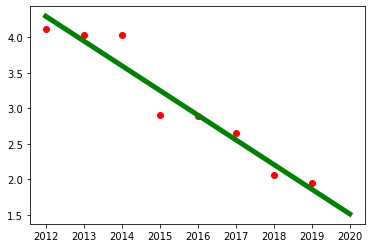

[[1.51512213]]


In [26]:
x = np.array(unemployment_df_for_lr_grouped.index).reshape(len(unemployment_df_for_lr_grouped.index), 1)
y = np.array(unemployment_df_for_lr_grouped['disabled_2_total_rate']).reshape(len(unemployment_df_for_lr_grouped.index), 1)
model = LinearRegression()
model.fit(x, y)
plt.scatter(x, y, color='red')
x = np.append(x, [2020]).reshape(len(unemployment_df_for_lr_grouped.index) + 1, 1)
plt.plot(x, model.predict(x), color = 'green', linewidth = 5)
plt.show()
print(model.predict(np.array(2020).reshape(1, 1)))

### 1.51512213